# Projeto: Ligações para o 911

Para este projeto estaremos analisando alguns dados de chamadas para o 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

## Dados e Configuração

**Importar numpy e pandas**

In [1]:
import numpy as np
import pandas as pd

**Importando as bibliotecas de visualização**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

**Lendo o arquivo**

In [4]:
df = pd.read_csv("911.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Perguntas básicas

**Quais são os top 5 CEPs nas chamadas 911?**

In [6]:
df['zip'];
df['zip'].value_counts(); #o value_counts dá de formar ordenada do maior para o menor
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Quais são os 5 principais municípios nas chamadas 911?**

In [7]:
df['twp'];
df['twp'].value_counts(); #o value_counts dá de formar ordenada do maior para o menor
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Verificando a coluna 'title'. Quantos códigos de título exclusivos existem?**

In [8]:
df['title'].nunique()

110

## Criando novos recursos

**Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic". Vamos usar o .apply() com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão" que contém esse valor de string.**

**Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS.**

In [9]:
df['title'].loc[0].split()

['EMS:', 'BACK', 'PAINS/INJURY']

In [10]:
df['title'].loc[0].split(':')[0]

'EMS'

In [12]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna?**

In [13]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

**Criando um countplot de chamadas 911 baseadas nesta nova coluna.**

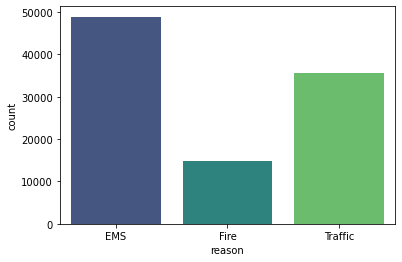

In [14]:
sns.countplot(x='reason',data=df,palette='viridis')

**Vamos verificar qual é o tipo de dados dos objetos na coluna timeStamp?**

In [15]:
type(df['timeStamp'].loc[0])

str

**Devemos notas que esses timestamps ainda são strings. Vamos usar [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para converter a coluna de strings em objetos DateTime.**

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [17]:
type(df['timeStamp'].loc[0])

pandas._libs.tslibs.timestamps.Timestamp

**Agora podemos pegar atributos específicos de um objeto Datetime chamando-os. Por exemplo:**

    time = df['timeStamp'].iloc[0]
    time.hour

**Agora que a coluna timestamp é realmente objetos DateTime, use .apply() para criar 3 novas colunas chamadas Hour, Month e Day of Week. Você criará essas colunas com base na coluna timeStamp, consulte as soluções se você ficar preso nesta etapa.**

In [18]:
time = df['timeStamp'].loc[0]

In [19]:
time.hour

17

In [20]:
df['timeStamp'].apply(lambda x: x.hour);
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Hour']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int64

In [21]:
df['timeStamp'].apply(lambda x: x.month);
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Month']

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: Month, Length: 99492, dtype: int64

In [22]:
df['timeStamp'].apply(lambda x: x.dayofweek);
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['Day of Week'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: Day of Week, dtype: int64

**Observe como o dia da demana é um número inteiro de 0-6. Vamos usar o .map() com este dicionário para mapear os nomes das seqüências reais para o dia da semana:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [23]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

**Vamos usar o Seaborn para criar um countplot da coluna "Day of Week" com a tonalidade baseada na coluna Reason.**

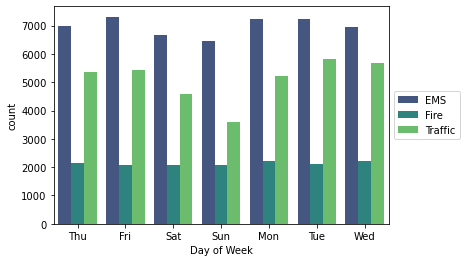

In [24]:
sns.countplot(x='Day of Week',data=df,hue='reason',palette='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))#para colocar o quadradinho para fora

**Fazendo o mesmo para o mês:**

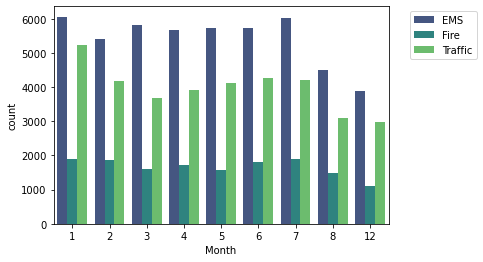

In [25]:
sns.countplot(x='Month',data=df,hue='reason',palette='viridis')
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))#para colocar o quadradinho para fora

**Deve-se notador que estavam faltando alguns meses. Vejamos se podemos talvez preencher essa informação ao traçar as informações de outra forma, possivelmente um plot de linha simples que preencha os meses que faltam. Para fazer isso, precisamos trabalhar com pandas...**

**Vamos criar um objeto groupby chamado "byMonth", onde você agrupa o DataFrame pela coluna do mês e use o método count() para agregação.**

In [26]:
byMonth = df.groupby('Month').count()#o count é um método de agregação, existem outros
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


**Vamos criar um plot simples fora do Dataframe indicando a contagem de chamadas por mês.**

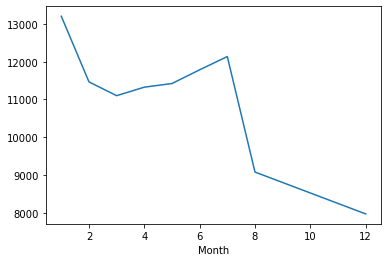

In [27]:
byMonth['lat'].plot()

**Vamos ver se podemos usar o lmplot() do Seaborn para criar um modelo linear no número de chamadas por mês.**

In [28]:
#primeiro tornamos o indice Month de byMonth (que são linhas) para colunas fazendo
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


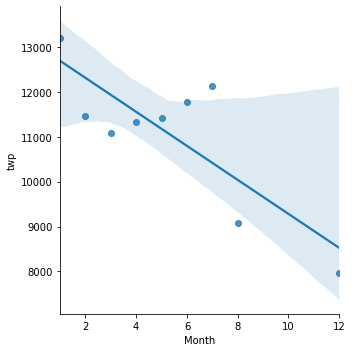

In [29]:
#então
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Criando uma nova coluna chamada 'Data' que contenha a data da coluna timeStamp.**

In [30]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

**Agora, vamos agrupar esta coluna Data com o groupby.**

In [31]:
df.groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


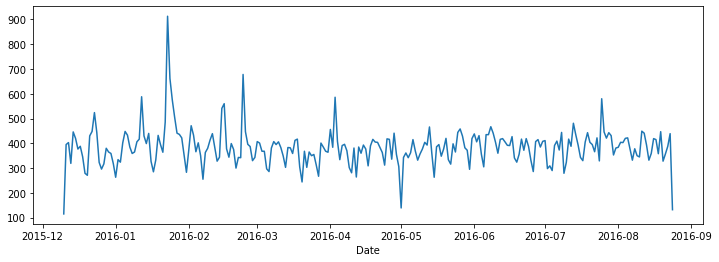

In [37]:
df.groupby('Date').count()['twp'].plot(figsize=(12,4))

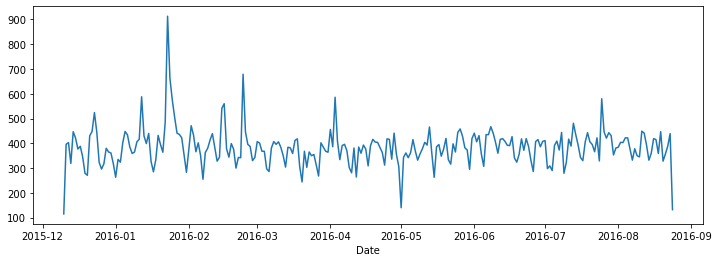

In [36]:
df.groupby('Date').count()['lat'].plot(figsize=(12,4))

**Vamos recriar esse plot, mas criando 3 plots separados com cada plot representando uma Razão para a chamada 911**

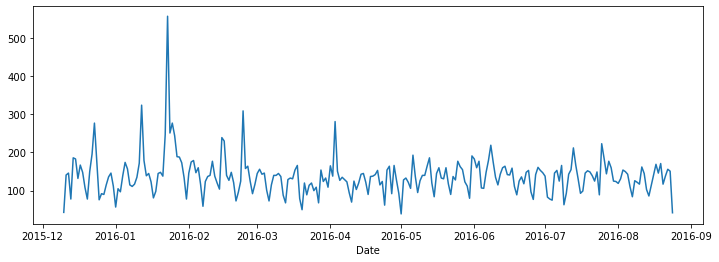

In [35]:
df['reason'] == 'Traffic';
df[df['reason'] == 'Traffic'].groupby('Date').count()['lat'].plot(figsize=(12,4))

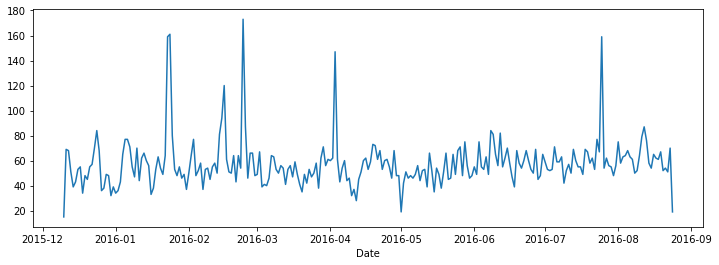

In [38]:
df['reason'] == 'Fire';
df[df['reason'] == 'Fire'].groupby('Date').count()['lat'].plot(figsize=(12,4))

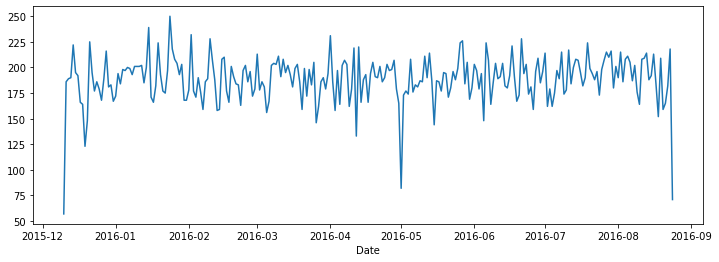

In [39]:
df['reason'] == 'EMS';
df[df['reason'] == 'EMS'].groupby('Date').count()['lat'].plot(figsize=(12,4))

**Agora vamos continuar a criar mapas de calor com seaborn e nossos dados. Em primeiro lugar, devemos reestruturar o quadro de dados para que as colunas se tornem horas e o Índice se torne o Dia da Semana.**

In [40]:
df.groupby(by=['Day of Week','Hour']).count();#by ajuda a agrupar por multiplas colunas
df.groupby(by=['Day of Week','Hour']).count()['twp']#escolhemos um dado aleatório (o twp)

Day of Week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wed          19      686
             20      668
             21      574
             22      490
             23      334
Name: twp, Length: 168, dtype: int64

In [41]:
#para o resultado final usamos o método unstack
dayHour = df.groupby(by=['Day of Week','Hour']).count()['twp'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


**Agora vamos criar um mapa de calor usando este DataFrame**

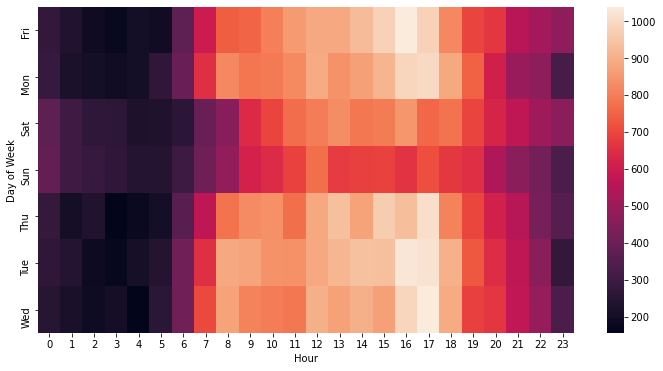

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayHour)

**Criando um clustermap usando este DataFrame.**

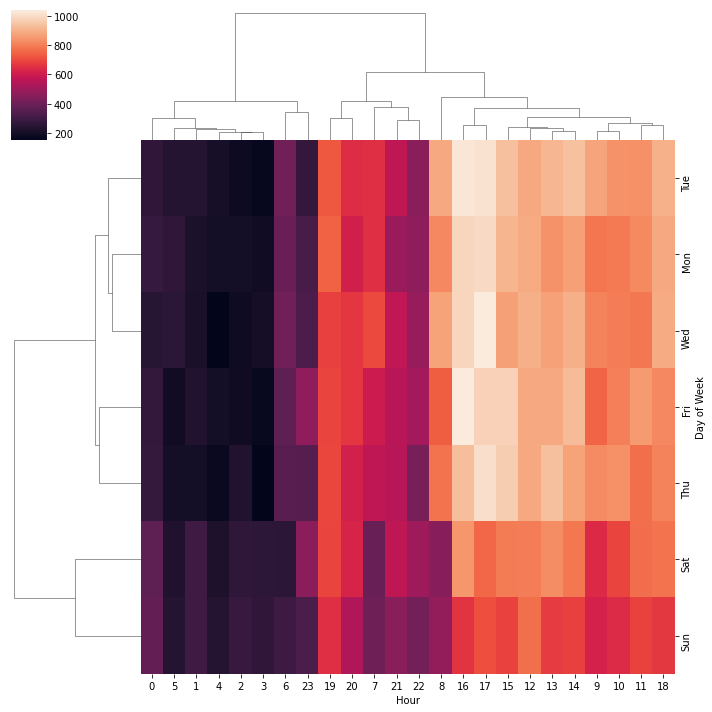

In [46]:
sns.clustermap(dayHour)

**Agora, vamos repitir estes mesmos plots e operações para um DataFrame que mostra o mês como a coluna.**

In [47]:
df.groupby(by=['Day of Week','Month']).count();#by ajuda a agrupar por multiplas colunas
df.groupby(by=['Day of Week','Month']).count()['twp']#escolhemos um dado aleatório (o twp)
#para o resultado final usamos o método unstack
dayMonth = df.groupby(by=['Day of Week','Month']).count()['twp'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


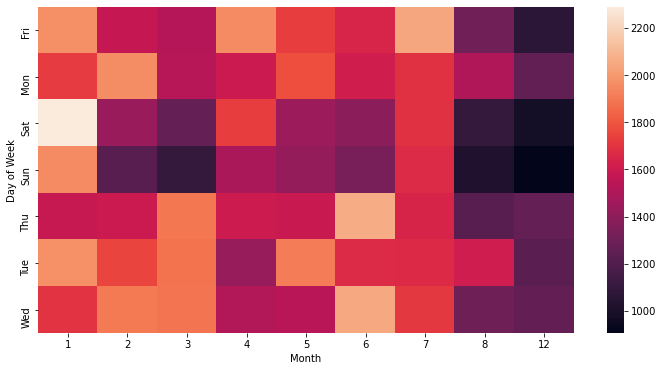

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayMonth)

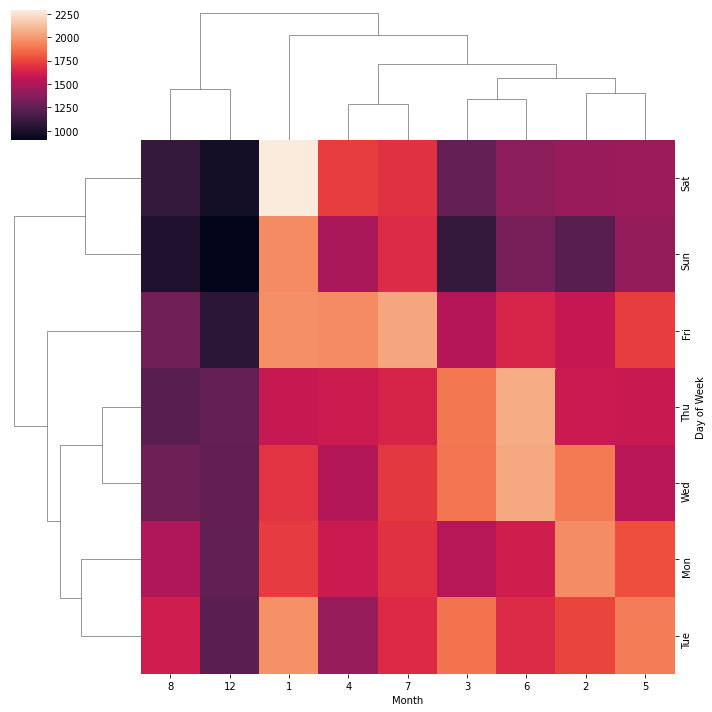

In [49]:
sns.clustermap(dayMonth)